In [10]:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl

## Read Data

In [11]:
csv_file='./data/players_%s.csv'
years = ['16', '17', '18', '19', '20']

fifa_total = pd.DataFrame()
for year in years:
    fifa_data = pd.read_csv(csv_file % year)
    fifa_data['year'] = '20%s' % year
    fifa_total = fifa_total.append(fifa_data)
    
fifa_total.head()

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,...,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,year
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,28,1987-06-24,170,72,Argentina,FC Barcelona,...,57+3,57+3,57+3,62+3,57+3,44+3,44+3,44+3,57+3,2016
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,30,1985-02-05,185,80,Portugal,Real Madrid,...,60+3,60+3,60+3,64+3,60+3,52+3,52+3,52+3,60+3,2016
2,9014,https://sofifa.com/player/9014/arjen-robben/16...,A. Robben,Arjen Robben,31,1984-01-23,180,80,Netherlands,FC Bayern München,...,60+3,60+3,60+3,65+3,59+3,47+3,47+3,47+3,59+3,2016
3,167495,https://sofifa.com/player/167495/manuel-neuer/...,M. Neuer,Manuel Neuer,29,1986-03-27,193,92,Germany,FC Bayern München,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016
4,176580,https://sofifa.com/player/176580/luis-suarez/1...,L. Suárez,Luis Alberto Suárez Díaz,28,1987-01-24,182,85,Uruguay,FC Barcelona,...,65+3,65+3,65+3,67+3,64+3,58+3,58+3,58+3,64+3,2016


### Define useful information (eg. players position group, useful columns)

In [12]:
forward = ['ls', 'st', 'rs', 'lw', 'lf', 'cf', 'rf', 'rw']
mid = ['lam', 'cam', 'ram', 'lm', 'lcm', 'cm', 'rcm', 'rm', 'ldm', 'cdm', 'rdm']
back = ['lwb', 'rwb', 'lb', 'lcb', 'cb', 'rcb', 'rb']
keeper = ['gk']

In [13]:
player_info_col = ['sofifa_id', 'player_url', 'short_name', 'age', 'height_cm', 'weight_kg', 
                   'nationality', 'club', 'overall', 'potential', 'value_eur', 'wage_eur', 
                   'player_positions', 'preferred_foot']

In [14]:
player_abilities_col = ['pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic', 
                        'gk_diving', 'gk_handling', 'gk_kicking', 'gk_reflexes', 'gk_speed', 'gk_positioning', 
                        'attacking_crossing', 'attacking_finishing', 'attacking_heading_accuracy', 
                        'attacking_short_passing', 'attacking_volleys', 'skill_dribbling', 'skill_curve', 'skill_fk_accuracy',
                        'skill_long_passing', 'skill_ball_control', 'movement_acceleration', 'movement_sprint_speed', 
                        'movement_agility', 'movement_reactions', 'movement_balance', 'power_shot_power', 
                        'power_jumping', 'power_stamina', 'power_strength', 'power_long_shots', 'mentality_aggression', 
                        'mentality_interceptions', 'mentality_positioning', 'mentality_vision', 'mentality_penalties', 
                        'mentality_composure', 'defending_marking', 'defending_standing_tackle', 'defending_sliding_tackle',
                        'goalkeeping_diving', 'goalkeeping_handling', 'goalkeeping_kicking', 'goalkeeping_positioning', 
                        'goalkeeping_reflexes']

### Handle Missing Data

In [15]:
fifa_total[player_abilities_col] = fifa_total[player_abilities_col].replace(np.NaN, 0)
fifa_total[player_abilities_col].head()

,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,...,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
0,92.0,88.0,86.0,95.0,24.0,62.0,0.0,0.0,0.0,0.0,...,74,0,13-12,23+2,21+1,6,11,15,14,8
1,92.0,93.0,80.0,91.0,33.0,78.0,0.0,0.0,0.0,0.0,...,85,0,22,31,23,7,11,15,14,11
2,92.0,86.0,82.0,92.0,32.0,64.0,0.0,0.0,0.0,0.0,...,80,0,29,26,26,10,8,11,5,15
3,0.0,0.0,0.0,0.0,0.0,0.0,85.0,87.0,91.0,86.0,...,37,0,10-15,10-15,11-14,85-3,87+2,91,90,86
4,83.0,88.0,79.0,87.0,42.0,79.0,0.0,0.0,0.0,0.0,...,85,0,30,45,38,27,25,31,33,37


### Handle +/- data

In [16]:
def calculate_diff(x):
    if isinstance(x, str):
        if "+" in x:
            x_split = x.split("+")
            x_new = int(x_split[0]) + int(x_split[1])
            return x_new
        elif "-" in x:
            x_split = x.split("-")
            x_new = int(x_split[0]) + int(x_split[1])
            return x_new
        else:
            return x
    else:
        return x

for col in player_abilities_col:
    fifa_total[col] = fifa_total[col].apply(calculate_diff)
fifa_total[player_abilities_col].head()

,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,...,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
0,92.0,88.0,86.0,95.0,24.0,62.0,0.0,0.0,0.0,0.0,...,74,0,25,25,22,6,11,15,14,8
1,92.0,93.0,80.0,91.0,33.0,78.0,0.0,0.0,0.0,0.0,...,85,0,22,31,23,7,11,15,14,11
2,92.0,86.0,82.0,92.0,32.0,64.0,0.0,0.0,0.0,0.0,...,80,0,29,26,26,10,8,11,5,15
3,0.0,0.0,0.0,0.0,0.0,0.0,85.0,87.0,91.0,86.0,...,37,0,25,25,25,88,89,91,90,86
4,83.0,88.0,79.0,87.0,42.0,79.0,0.0,0.0,0.0,0.0,...,85,0,30,45,38,27,25,31,33,37


#### Age Vs Performance

In [38]:
fifa_performance_sorted_years = fifa_total.sort_values(by=['sofifa_id', 'age'])
fifa_performance_sorted_years = fifa_performance_sorted_years[['sofifa_id', 'age', 'overall']]

fifa_performance_sorted_years.head()

,sofifa_id,age,overall
4708,2,33,69
2881,164,35,73
5143,164,37,70
327,330,34,80
449,330,35,80


##### Fill missing age

In [42]:
temp = None
fifa_temp = pd.DataFrame()
fifa_performance_sorted_years['change'] = 0
for index, row in fifa_performance_sorted_years.iterrows():
    if temp is None or temp['sofifa_id'] != row['sofifa_id']:
        temp = row
    else:
        #change = (row['overall'] - temp['overall']) / temp['overall']
        if row['age'] - temp['age'] != 1:
            fill = dict(
                sofifa_id=row['sofifa_id'],
                age=temp['age']+1,
                overall=temp['overall'],
                change=0
            )
            temp = fill
            fifa_temp = fifa_temp.append(fill, ignore_index=True)
        #fifa_performance_sorted_years.at[index, 'change'] = change
fifa_performance_sorted_years = fifa_performance_sorted_years.append(fifa_temp, ignore_index=True)
fifa_performance_sorted_years = fifa_performance_sorted_years.sort_values(by=['sofifa_id', 'age'])        
fifa_performance_sorted_years.head(10)

,age,change,overall,sofifa_id
0,33.0,0.0,69.0,2.0
1,35.0,0.0,73.0,164.0
2,36.0,0.0,73.0,164.0
118234,36.0,0.0,73.0,164.0
3,37.0,0.0,70.0,164.0
4,34.0,0.0,80.0,330.0
5,35.0,0.0,80.0,330.0
6,39.0,0.0,63.0,591.0
7,40.0,0.0,58.0,591.0
8,40.0,0.0,63.0,591.0


#### Calculate change of overall performance

In [43]:
temp = None
for index, row in fifa_performance_sorted_years.iterrows():
    if temp is None or temp['sofifa_id'] != row['sofifa_id']:
        temp = row
    else:
        change = (row['overall'] - temp['overall']) / temp['overall']
        fifa_performance_sorted_years.at[index, 'change'] = change
        
fifa_performance_sorted_years.head(10)

,age,change,overall,sofifa_id
0,33.0,0.000000,69.0,2.0
1,35.0,0.000000,73.0,164.0
2,36.0,0.000000,73.0,164.0
118234,36.0,0.000000,73.0,164.0
3,37.0,-0.041096,70.0,164.0
4,34.0,0.000000,80.0,330.0
5,35.0,0.000000,80.0,330.0
6,39.0,0.000000,63.0,591.0
7,40.0,-0.079365,58.0,591.0
8,40.0,0.000000,63.0,591.0


In [ ]:
from sklearn.preprocessing import MinMaxScaler

performance_col = ['overall', 'potential', 'value_eur', 'wage_eur']
performance_col.extend(player_abilities_col)

data_y = fifa_total.loc[:, 'change']
data_x = fifa_total.loc[:, 'age']

In [44]:
fifa_performance_sorted_years_non_zero_change = fifa_performance_sorted_years[fifa_performance_sorted_years.change != 0]
fifa_performance_sorted_years_non_zero_change.head(10)

,age,change,overall,sofifa_id
3,37.0,-0.041096,70.0,164.0
7,40.0,-0.079365,58.0,591.0
9,41.0,-0.063492,59.0,591.0
13,33.0,0.029412,70.0,657.0
15,34.0,0.014706,69.0,657.0
17,35.0,-0.029412,66.0,657.0
24,34.0,-0.013333,74.0,768.0
26,32.0,0.015625,65.0,887.0
28,33.0,0.015625,65.0,887.0
31,35.0,0.013333,76.0,1178.0


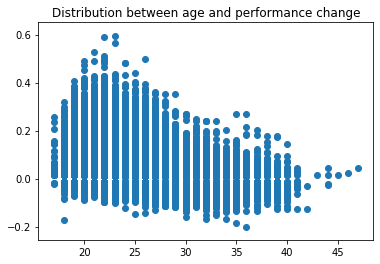

In [104]:
from sklearn.model_selection import train_test_split
fifa_performance_X = fifa_performance_sorted_years_non_zero_change['age'].values.reshape(-1,1)
fifa_performance_Y = fifa_performance_sorted_years_non_zero_change['change']

x_train, x_test, y_train, y_test = train_test_split(fifa_performance_X, fifa_performance_Y, test_size= 0.2, random_state=420)
plt.scatter(fifa_performance_X, fifa_performance_Y)
plt.title("Distribution between age and performance change")
plt.show()

In [105]:
age_min = int(fifa_performance_sorted_years_non_zero_change['age'].min())
age_max = int(fifa_performance_sorted_years_non_zero_change['age'].max())
              
age_range = np.arange(age_min, age_max).reshape(-1, 1)

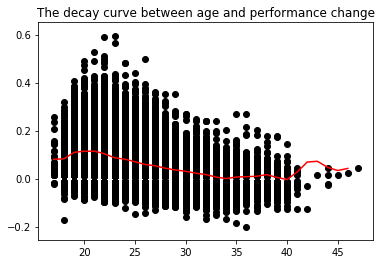

In [106]:
from sklearn.svm import SVR

svr_rbf = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=.1)
svr_rbf.fit(x_train, y_train)
svr_predit = svr_rbf.predict(age_range)
plt.scatter(fifa_performance_X, fifa_performance_Y, c='k')
plt.plot(age_range, svr_predit, c='r')
plt.title("The decay curve between age and performance change")
plt.show()

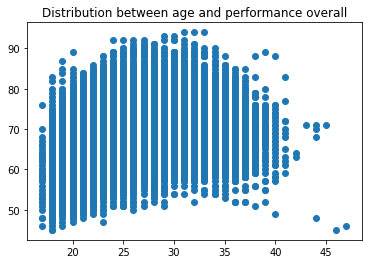

In [110]:
fifa_performance_Y_s = fifa_performance_sorted_years_non_zero_change['overall']

x_train, x_test, y_train, y_test = train_test_split(fifa_performance_X, fifa_performance_Y_s, test_size= 0.2, random_state=420)
plt.scatter(fifa_performance_X, fifa_performance_Y_s)
plt.title("Distribution between age and performance overall")
plt.show()

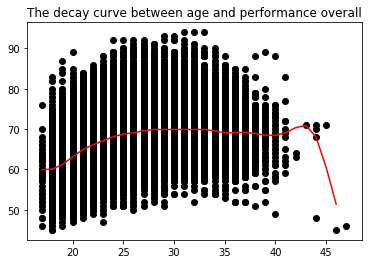

In [111]:
svr_rbf = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=.1)
svr_rbf.fit(x_train, y_train)
svr_predit = svr_rbf.predict(age_range)
plt.scatter(fifa_performance_X, fifa_performance_Y_s, c='k')
plt.plot(age_range, svr_predit, c='r')
plt.title("The decay curve between age and performance overall")
plt.show()